# TITLE: PREDICTING LENGTH OF STAY OF INPATIENTS IN A HOSPITAL
This project involves developing a model that predicts the likely number of days a patient will spend on admission. The project utilizes 2017 Hospital Inpatient Discharges (SPARCS De-Identified) data. The Statewide Planning and Research Cooperative System (SPARCS) Inpatient De-identified File contains discharge level detail on patient characteristics, diagnoses, treatments, services, and charges. This data file contains basic record level detail for the discharge. The de-identified data file does not contain data that is protected health information (PHI) under HIPAA. The health information is not individually identifiable; all data elements considered identifiable have been redacted. For example, the direct identifiers regarding a date have the day and month portion of the date removed

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option ('display.max_columns', None)

In [2]:
df = pd.read_csv('Hospital_Inpatient_Discharges__SPARCS_De-Identified___2017.csv',
           low_memory=False)

In [3]:
df.head()

,Hospital Service Area,Hospital County,Operating Certificate Number,Permanent Facility Id,Facility Name,Age Group,Zip Code - 3 digits,Gender,Race,Ethnicity,Length of Stay,Type of Admission,Patient Disposition,Discharge Year,CCS Diagnosis Code,CCS Diagnosis Description,CCS Procedure Code,CCS Procedure Description,APR DRG Code,APR DRG Description,APR MDC Code,APR MDC Description,APR Severity of Illness Code,APR Severity of Illness Description,APR Risk of Mortality,APR Medical Surgical Description,Payment Typology 1,Payment Typology 2,Payment Typology 3,Birth Weight,Abortion Edit Indicator,Emergency Department Indicator,Total Charges,Total Costs
0,Hudson Valley,Westchester,5903001.0,1061.0,Montefiore Mount Vernon Hospital,30 to 49,NaN,M,White,Not Span/Hispanic,21,Elective,Home or Self Care,2017,659,Schizophrenia and other psychotic disorders,0,NO PROC,750,Schizophrenia,19,Mental Diseases and Disorders,2,Moderate,Minor,Medical,Medicare,Medicare,Self-Pay,NaN,N,N,114168.00,40464.04
1,Hudson Valley,Westchester,5903001.0,1061.0,Montefiore Mount Vernon Hospital,50 to 69,105,M,White,Spanish/Hispanic,8,Emergency,Skilled Nursing Home,2017,99,Hypertension with complications and secondary ...,108,INDWELLING CATHETER,194,Heart failure,5,Diseases and Disorders of the Circulatory System,3,Major,Moderate,Medical,Medicaid,Medicaid,Self-Pay,NaN,N,N,58517.00,26046.50
2,Hudson Valley,Westchester,5903001.0,1061.0,Montefiore Mount Vernon Hospital,30 to 49,105,F,White,Unknown,6,Emergency,Court/Law Enforcement,2017,161,Other diseases of kidney and ureters,102,URETERAL CATHETERIZATN,465,Urinary stones & acquired upper urinary tract ...,11,Diseases and Disorders of the Kidney and Urina...,2,Moderate,Moderate,Medical,Department of Corrections,Self-Pay,NaN,NaN,N,N,39647.04,17397.59
3,Hudson Valley,Westchester,5903001.0,1061.0,Montefiore Mount Vernon Hospital,50 to 69,105,F,White,Not Span/Hispanic,4,Emergency,Skilled Nursing Home,2017,238,Complications of surgical procedures or medica...,222,BLOOD TRANSFUSION,721,"Post-operative, post-traumatic, other device i...",18,"Infectious and Parasitic Diseases, Systemic or...",2,Moderate,Moderate,Medical,Medicaid,Medicaid,Self-Pay,NaN,N,N,36031.09,16118.84
4,Hudson Valley,Westchester,5903001.0,1061.0,Montefiore Mount Vernon Hospital,18 to 29,105,F,White,Spanish/Hispanic,4,Emergency,Court/Law Enforcement,2017,2,Septicemia (except in labor),0,NO PROC,720,Septicemia & disseminated infections,18,"Infectious and Parasitic Diseases, Systemic or...",2,Moderate,Minor,Medical,Department of Corrections,Self-Pay,NaN,NaN,N,N,30534.00,11921.05


In [4]:
df.tail(5)

,Hospital Service Area,Hospital County,Operating Certificate Number,Permanent Facility Id,Facility Name,Age Group,Zip Code - 3 digits,Gender,Race,Ethnicity,Length of Stay,Type of Admission,Patient Disposition,Discharge Year,CCS Diagnosis Code,CCS Diagnosis Description,CCS Procedure Code,CCS Procedure Description,APR DRG Code,APR DRG Description,APR MDC Code,APR MDC Description,APR Severity of Illness Code,APR Severity of Illness Description,APR Risk of Mortality,APR Medical Surgical Description,Payment Typology 1,Payment Typology 2,Payment Typology 3,Birth Weight,Abortion Edit Indicator,Emergency Department Indicator,Total Charges,Total Costs
2343564,Hudson Valley,Rockland,4329000.0,779.0,Good Samaritan Hospital of Suffern,50 to 69,109,F,White,Not Span/Hispanic,2,Elective,Home or Self Care,2017,133,Other lower respiratory disease,36,LOBECTOMY/PNEUMONECTOMY,120,Major respiratory & chest procedures,4,Diseases and Disorders of the Respiratory System,1,Minor,Moderate,Surgical,Private Health Insurance,Medicare,NaN,NaN,N,N,87545.08,16781.23
2343565,Hudson Valley,Rockland,4329000.0,779.0,Good Samaritan Hospital of Suffern,50 to 69,109,F,Other Race,Spanish/Hispanic,2,Emergency,Home or Self Care,2017,101,Coronary atherosclerosis and other heart disease,0,NO PROC,198,Angina pectoris & coronary atherosclerosis,5,Diseases and Disorders of the Circulatory System,2,Moderate,Moderate,Medical,Medicaid,NaN,NaN,NaN,N,Y,31896.05,6003.38
2343566,Hudson Valley,Rockland,4329000.0,779.0,Good Samaritan Hospital of Suffern,30 to 49,NaN,M,Other Race,Not Span/Hispanic,3,Emergency,Home or Self Care,2017,205,Spondylosis; intervertebral disc disorders; ot...,0,NO PROC,347,"Other back & neck disorders, fractures & injuries",8,Diseases and Disorders of the Musculoskeletal ...,1,Minor,Minor,Medical,Miscellaneous/Other,Medicaid,NaN,NaN,N,Y,49292.49,8863.14
2343567,New York City,Bronx,7000006.0,3058.0,Montefiore Med Center - Jack D Weiler Hosp of ...,70 or Older,104,F,Black/African American,Unknown,2,Elective,Home or Self Care,2017,25,Cancer of uterus,124,HYSTERECTOMY; AB/VAG,512,Uterine & adnexa procedures for non-ovarian & ...,13,Diseases and Disorders of the Female Reproduct...,2,Moderate,Minor,Surgical,Medicare,NaN,NaN,NaN,N,N,66399.81,13068.87
2343568,Finger Lakes,Steuben,5002001.0,870.0,St James Mercy Hospital,18 to 29,148,F,White,Not Span/Hispanic,1,Emergency,Inpatient Rehabilitation Facility,2017,660,Alcohol-related disorders,219,ALCO/DRUG REHAB/DETOX,775,Alcohol abuse & dependence,20,Alcohol/Drug Use and Alcohol/Drug Induced Orga...,2,Moderate,Minor,Medical,Medicaid,NaN,NaN,NaN,N,Y,2933.75,1225.95


## Data Cleaning

In [5]:
df.shape

(2343569, 34)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2343569 entries, 0 to 2343568
Data columns (total 34 columns):
 #   Column                               Dtype  
---  ------                               -----  
 0   Hospital Service Area                object 
 1   Hospital County                      object 
 2   Operating Certificate Number         float64
 3   Permanent Facility Id                float64
 4   Facility Name                        object 
 5   Age Group                            object 
 6   Zip Code - 3 digits                  object 
 7   Gender                               object 
 8   Race                                 object 
 9   Ethnicity                            object 
 10  Length of Stay                       object 
 11  Type of Admission                    object 
 12  Patient Disposition                  object 
 13  Discharge Year                       int64  
 14  CCS Diagnosis Code                   int64  
 15  CCS Diagnosis Description       

In [7]:
df.dtypes

Hospital Service Area                   object
Hospital County                         object
Operating Certificate Number           float64
Permanent Facility Id                  float64
Facility Name                           object
Age Group                               object
Zip Code - 3 digits                     object
Gender                                  object
Race                                    object
Ethnicity                               object
Length of Stay                          object
Type of Admission                       object
Patient Disposition                     object
Discharge Year                           int64
CCS Diagnosis Code                       int64
CCS Diagnosis Description               object
CCS Procedure Code                       int64
CCS Procedure Description               object
APR DRG Code                             int64
APR DRG Description                     object
APR MDC Code                             int64
APR MDC Descr

In [8]:
df.isna().sum()

Hospital Service Area                     5155
Hospital County                           5155
Operating Certificate Number              5155
Permanent Facility Id                     5155
Facility Name                                0
Age Group                                    0
Zip Code - 3 digits                      39019
Gender                                       0
Race                                         0
Ethnicity                                    0
Length of Stay                               0
Type of Admission                            0
Patient Disposition                          0
Discharge Year                               0
CCS Diagnosis Code                           0
CCS Diagnosis Description                    0
CCS Procedure Code                           0
CCS Procedure Description                    0
APR DRG Code                                 0
APR DRG Description                          0
APR MDC Code                                 0
APR MDC Descr

##### Treating null values

In [9]:
# Birth Weight column has more than 80% of its values to be null 
# which makes it not so useful
# We will drop this column

df.drop('Birth Weight', axis= 1, inplace= True)

Multiple `Payment Typology` columns is meant to display each payment type where a patient had multiple payment types. For patients who have only two or one type of payment, their other payment typology columns will be null. To clean this, we will replace the null values with string "None"

In [10]:
df['Payment Typology 1'].fillna('None', inplace= True)
df['Payment Typology 2'].fillna('None', inplace= True)
df['Payment Typology 3'].fillna('None', inplace= True)

Other null values can be dropped

In [11]:
df.dropna(inplace= True)

In [12]:
df.isna().sum()

Hospital Service Area                  0
Hospital County                        0
Operating Certificate Number           0
Permanent Facility Id                  0
Facility Name                          0
Age Group                              0
Zip Code - 3 digits                    0
Gender                                 0
Race                                   0
Ethnicity                              0
Length of Stay                         0
Type of Admission                      0
Patient Disposition                    0
Discharge Year                         0
CCS Diagnosis Code                     0
CCS Diagnosis Description              0
CCS Procedure Code                     0
CCS Procedure Description              0
APR DRG Code                           0
APR DRG Description                    0
APR MDC Code                           0
APR MDC Description                    0
APR Severity of Illness Code           0
APR Severity of Illness Description    0
APR Risk of Mort

##### Treating duplicates

In [13]:
df.duplicated().sum()

31344

In [14]:
df.drop_duplicates(inplace= True)

##### Fixing data types
Although, a number of columns were spotted with inappropriate data types, we will only fix 1 column namely: `Length of Stay`. This is because other faulty columns are not necessary for the analysis and model building and will be eventually dropped. The appropriate data type for the column is "Integer"

In [15]:
# An strange value '120+' was found in Length of Stay column

III = df[df['Length of Stay'].str.contains('120 +')].index # Getting the indices of affected records

df.drop(III, inplace= True)

In [16]:
# Converting columns to integers

inted = ['Length of Stay']

for item in inted:
    df[item] = df[item].astype('int64')

In [17]:
# Dropping unneeded columns
unneeded = ['Operating Certificate Number', 'Permanent Facility Id', 
            'Zip Code - 3 digits', 'CCS Diagnosis Code','CCS Procedure Code',
            'APR DRG Code', 'APR MDC Code', 'APR Severity of Illness Code', 
            'Discharge Year', 'Abortion Edit Indicator', 'CCS Diagnosis Description',
            'CCS Procedure Description', 'APR DRG Description']

df.drop(columns= unneeded, inplace= True)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2271344 entries, 1 to 2343568
Data columns (total 20 columns):
 #   Column                               Dtype  
---  ------                               -----  
 0   Hospital Service Area                object 
 1   Hospital County                      object 
 2   Facility Name                        object 
 3   Age Group                            object 
 4   Gender                               object 
 5   Race                                 object 
 6   Ethnicity                            object 
 7   Length of Stay                       int64  
 8   Type of Admission                    object 
 9   Patient Disposition                  object 
 10  APR MDC Description                  object 
 11  APR Severity of Illness Description  object 
 12  APR Risk of Mortality                object 
 13  APR Medical Surgical Description     object 
 14  Payment Typology 1                   object 
 15  Payment Typology 2              

The column names should be in snake cases for easy coding

In [19]:
# Creating list of new column names

names = []
for i, r in enumerate(df.columns):
    names.append(df.columns[i].replace(' ', '_'))

names

['Hospital_Service_Area',
 'Hospital_County',
 'Facility_Name',
 'Age_Group',
 'Gender',
 'Race',
 'Ethnicity',
 'Length_of_Stay',
 'Type_of_Admission',
 'Patient_Disposition',
 'APR_MDC_Description',
 'APR_Severity_of_Illness_Description',
 'APR_Risk_of_Mortality',
 'APR_Medical_Surgical_Description',
 'Payment_Typology_1',
 'Payment_Typology_2',
 'Payment_Typology_3',
 'Emergency_Department_Indicator',
 'Total_Charges',
 'Total_Costs']

In [20]:
df.rename(columns= dict(zip(df.columns, names)), inplace= True)

In [21]:
df.head(5)

,Hospital_Service_Area,Hospital_County,Facility_Name,Age_Group,Gender,Race,Ethnicity,Length_of_Stay,Type_of_Admission,Patient_Disposition,APR_MDC_Description,APR_Severity_of_Illness_Description,APR_Risk_of_Mortality,APR_Medical_Surgical_Description,Payment_Typology_1,Payment_Typology_2,Payment_Typology_3,Emergency_Department_Indicator,Total_Charges,Total_Costs
1,Hudson Valley,Westchester,Montefiore Mount Vernon Hospital,50 to 69,M,White,Spanish/Hispanic,8,Emergency,Skilled Nursing Home,Diseases and Disorders of the Circulatory System,Major,Moderate,Medical,Medicaid,Medicaid,Self-Pay,N,58517.00,26046.50
2,Hudson Valley,Westchester,Montefiore Mount Vernon Hospital,30 to 49,F,White,Unknown,6,Emergency,Court/Law Enforcement,Diseases and Disorders of the Kidney and Urina...,Moderate,Moderate,Medical,Department of Corrections,Self-Pay,None,N,39647.04,17397.59
3,Hudson Valley,Westchester,Montefiore Mount Vernon Hospital,50 to 69,F,White,Not Span/Hispanic,4,Emergency,Skilled Nursing Home,"Infectious and Parasitic Diseases, Systemic or...",Moderate,Moderate,Medical,Medicaid,Medicaid,Self-Pay,N,36031.09,16118.84
4,Hudson Valley,Westchester,Montefiore Mount Vernon Hospital,18 to 29,F,White,Spanish/Hispanic,4,Emergency,Court/Law Enforcement,"Infectious and Parasitic Diseases, Systemic or...",Moderate,Minor,Medical,Department of Corrections,Self-Pay,None,N,30534.00,11921.05
5,Hudson Valley,Westchester,Montefiore Mount Vernon Hospital,50 to 69,M,Black/African American,Not Span/Hispanic,3,Emergency,Short-term Hospital,Diseases and Disorders of the Hepatobiliary Sy...,Major,Major,Medical,Medicare,Medicare,Self-Pay,N,49290.08,18503.26


In [22]:
df.shape

(2271344, 20)

## EDA

For this exploration, the variable of interest is `Length_of_Stay`.

### Univariate Exploration

In [23]:
df.describe()

,Length_of_Stay,Total_Charges,Total_Costs
count,2.271344e+06,2.271344e+06,2.271344e+06
mean,5.325689e+00,4.930390e+04,1.644281e+04
std,7.270399e+00,8.453250e+04,4.030503e+04
min,1.000000e+00,1.000000e-02,0.000000e+00
25%,2.000000e+00,1.385690e+04,4.895142e+03
50%,3.000000e+00,2.695178e+04,9.029105e+03
75%,6.000000e+00,5.352055e+04,1.738647e+04
max,1.190000e+02,6.475998e+06,8.868613e+06


In [24]:
# creating a function for plotting bar charts
def bchart (column):
    data = df[column].value_counts()
    plt.bar(data.index, data)
    plt.xlabel(column.replace('_', ' '))
    plt.ylabel('Frequency')
    plt.title('CHART OF {x}'.format(x= column.upper().replace('_', ' ')));

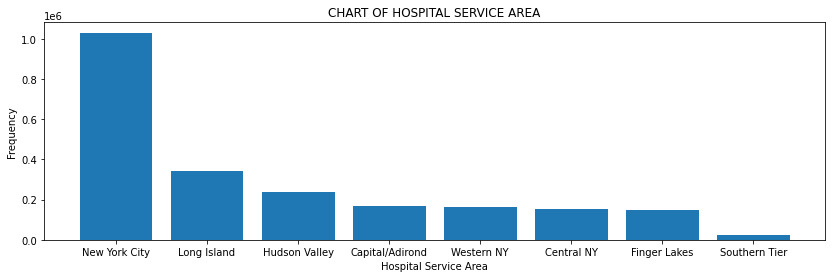

In [25]:
plt.figure(figsize= (14,4))

bchart('Hospital_Service_Area')

New york city recorded the most number of cases

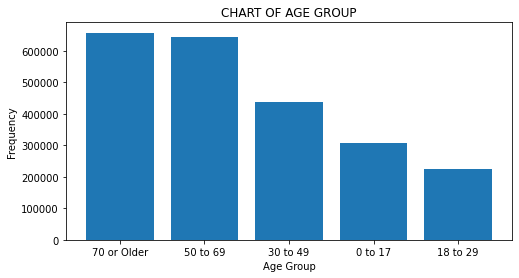

In [26]:
plt.figure(figsize= (8,4))

bchart('Age_Group')

Older people (50 years and above) were seen to fall sick more than younger ones

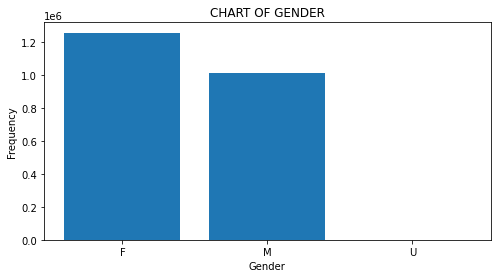

In [27]:
plt.figure(figsize= (8,4))

bchart('Gender')

There were more female cases than males

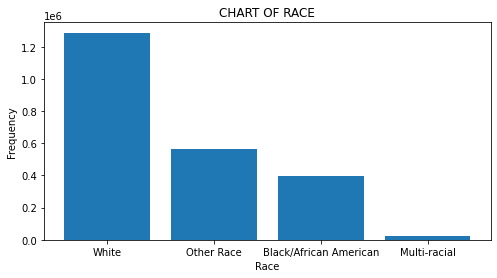

In [28]:
plt.figure(figsize= (8,4))

bchart('Race')

Whites recorded the highest number of cases

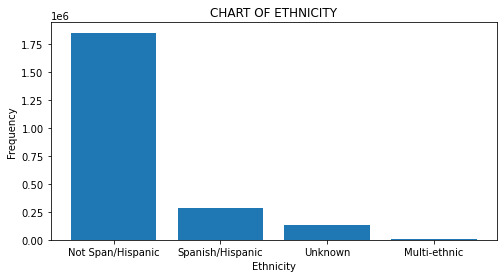

In [29]:
plt.figure(figsize= (8,4))

bchart('Ethnicity')

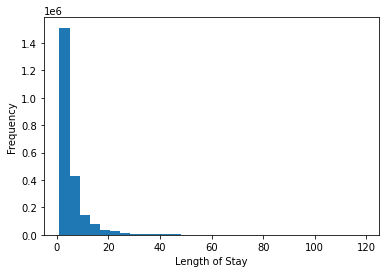

In [30]:
plt.hist(df['Length_of_Stay'], bins= 30)
plt.xlabel('Length of Stay')
plt.ylabel('Frequency');

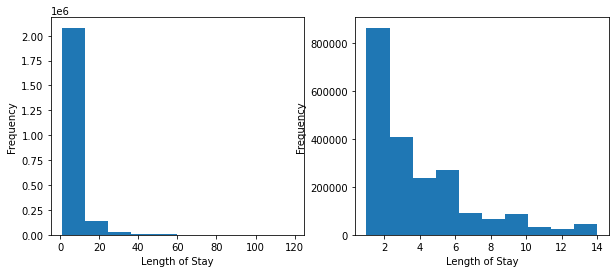

In [69]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.hist(df['Length_of_Stay'])
plt.xlabel('Length of Stay')
plt.ylabel('Frequency');

plt.subplot(1,2,2)
plt.hist(df.query('Length_of_Stay < 15')['Length_of_Stay'])
plt.xlabel('Length of Stay')
plt.ylabel('Frequency');

The data is highly skewed to the right due to the presence of outliers. Let's visualize it using a boxplot

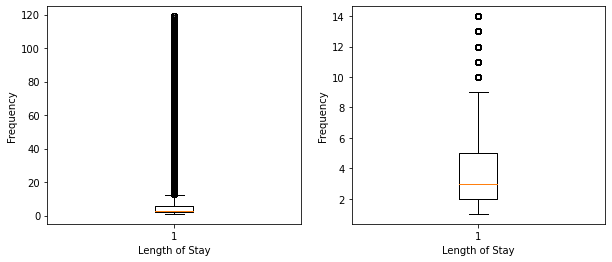

In [31]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.boxplot(df['Length_of_Stay'])
plt.xlabel('Length of Stay')
plt.ylabel('Frequency');

plt.subplot(1,2,2)
plt.boxplot(df.query('Length_of_Stay < 15')['Length_of_Stay'])
plt.xlabel('Length of Stay')
plt.ylabel('Frequency');

The maximum length of stay is 9 days for majority of the patients. Any value above that is an outlier

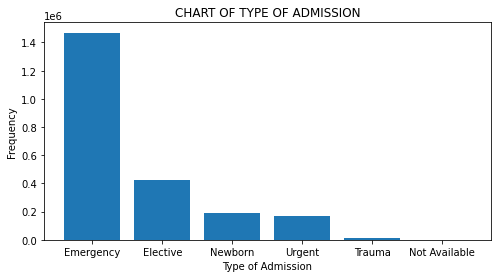

In [32]:
plt.figure(figsize= (8,4))

bchart('Type_of_Admission')

A large percentage of the records were emergency cases

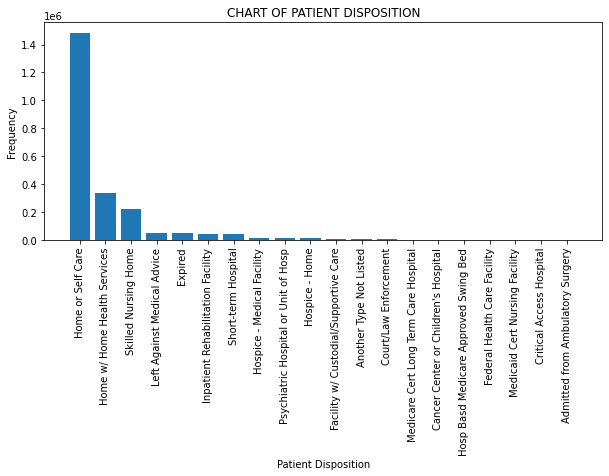

In [33]:
plt.figure(figsize= (10,4))

bchart('Patient_Disposition')
plt.xticks(rotation= 90);

Most patients were discharged to go home which shows their full recovery

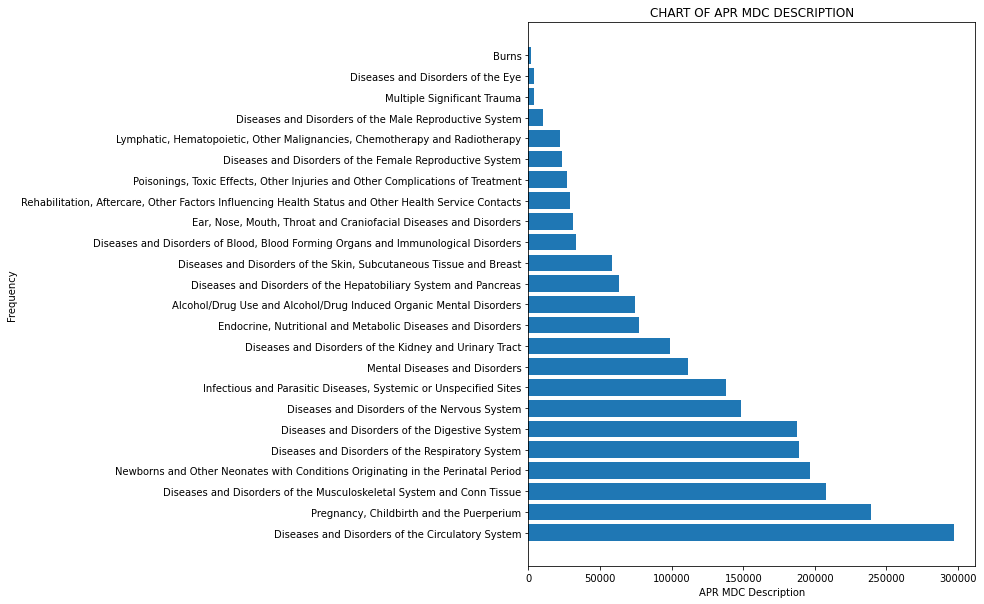

In [34]:
plt.figure(figsize= (8,10))

data = df['APR_MDC_Description'].value_counts()
plt.barh(data.index, data)
plt.xlabel('APR_MDC_Description'.replace('_', ' '))
plt.ylabel('Frequency')
plt.title('CHART OF {x}'.format(x= 'APR_MDC_Description'.upper().replace('_', ' ')));

# bchart('APR_MDC_Description')
# plt.xticks(rotation= 90);

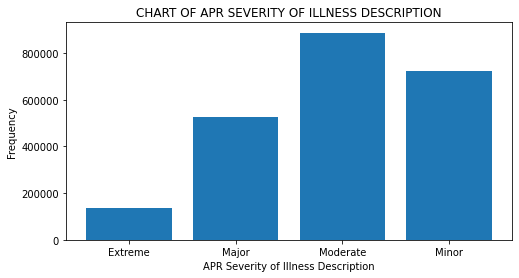

In [35]:
plt.figure(figsize= (8,4))

# bchart('APR Severity of Illness Description')
data = df['APR_Severity_of_Illness_Description'].value_counts()
data = data.reindex(['Extreme', 'Major', 'Moderate', 'Minor'])
plt.bar(data.index, data)
plt.xlabel('APR Severity of Illness Description')
plt.ylabel('Frequency')
plt.title('CHART OF {x}'.format(x= 'APR Severity of Illness Description'.upper()));

A few cases were extreme and most cases were either minor or moderate

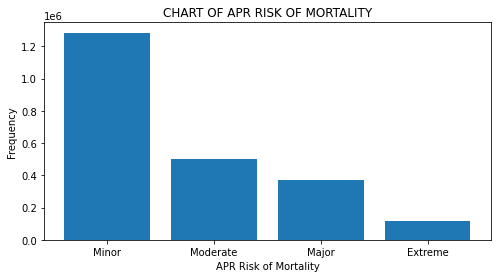

In [36]:
plt.figure(figsize= (8,4))

bchart('APR_Risk_of_Mortality')

Most patients were not likely to die from their ailment.

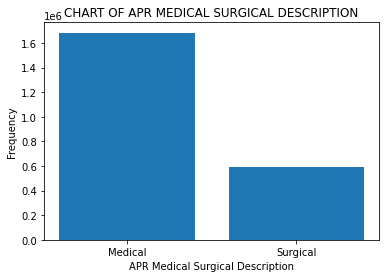

In [37]:
plt.figure(figsize= (6,4))

cc = bchart('APR_Medical_Surgical_Description')

There were more cases in need of medical attention than cases that require surgery

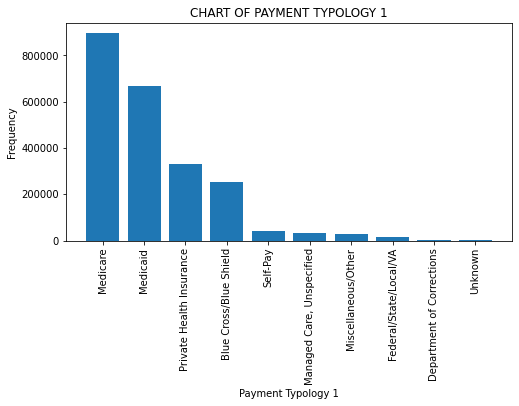

In [38]:
plt.figure(figsize= (8,4))

bchart('Payment_Typology_1')
plt.xticks(rotation= 90);

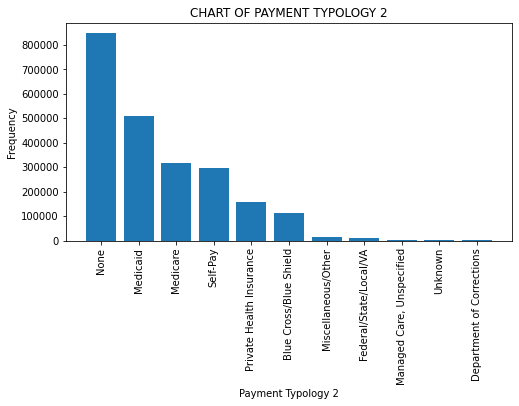

In [39]:
plt.figure(figsize= (8,4))

bchart('Payment_Typology_2')
plt.xticks(rotation= 90);

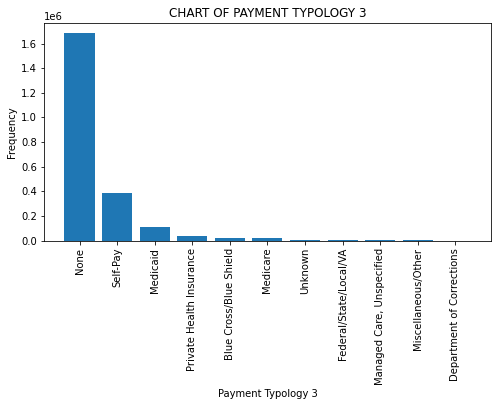

In [40]:
plt.figure(figsize= (8,4))

bchart('Payment_Typology_3')
plt.xticks(rotation= 90);

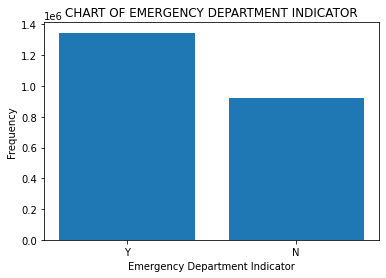

In [41]:
# plt.figure(figsize= (8,4))

bchart('Emergency_Department_Indicator')

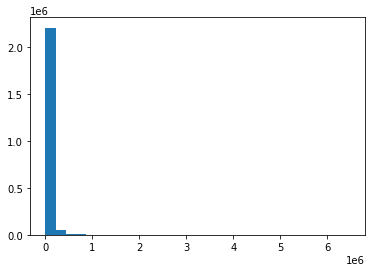

In [42]:
plt.hist(df['Total_Charges'], bins= 30);

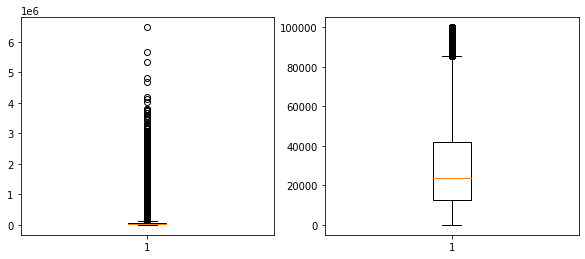

In [43]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.boxplot(df['Total_Charges'])

plt.subplot(1,2,2)
plt.boxplot(df.query('Total_Charges < 100000')['Total_Charges']);

Values above 80000 appear to be outliers

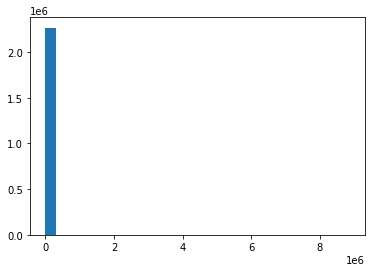

In [44]:
plt.hist(df['Total_Costs'], bins= 30);

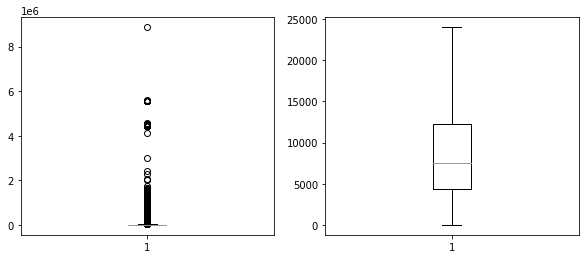

In [45]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.boxplot(df['Total_Costs'])

plt.subplot(1,2,2)
plt.boxplot(df.query('Total_Costs < 24000')['Total_Costs']);

Values above 24000 appear to be outliers

### Bivariate Exploration

We will analyse each variable with length of stay. Outliers in the `Length_of_Stay` column will be removed

In [46]:
df1 = df.query('Length_of_Stay < 10')

In [47]:
# Function for plotting violin plots
def vio (column):
    sns.violinplot(x= column, y= 'Length_of_Stay', data= df1)

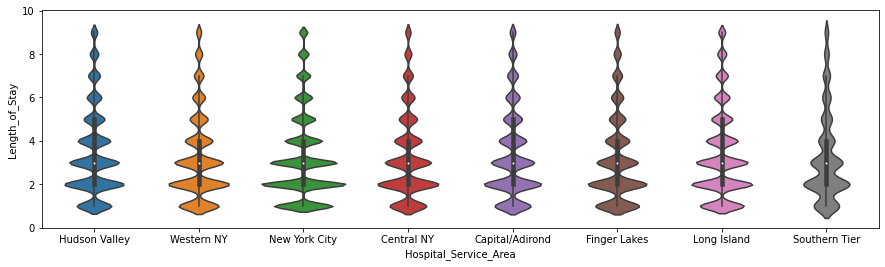

In [48]:
# Length of Stay and Hospital service area

plt.figure(figsize=(15,4))

vio('Hospital_Service_Area')

All areas have similar distributions. A lot of patients were on admission for only 2 days

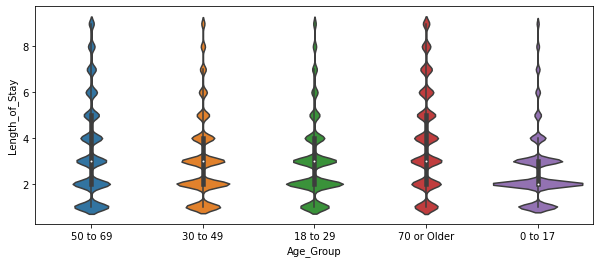

In [49]:
# Length of Stay and Age Group

plt.figure(figsize=(10,4))

vio('Age_Group')

- For patients in group 0 to 17, majority were discharged within 3 days
- Similarly, patients in group 18 to 29, majority were discharged within 3 days
- Patients in group 30 to 49 follow the same pattern above
- For patients in group 50 to 69, the distribution drops gradually up the graph which implies more people stay in admission for longer number of days
- And for patients above 70, more patients spend above 4 days in admission compared to younger age groups

Let's examine patients who stay beyond 10 days on admission (the outliers)

<AxesSubplot: xlabel='Age_Group', ylabel='Length_of_Stay'>

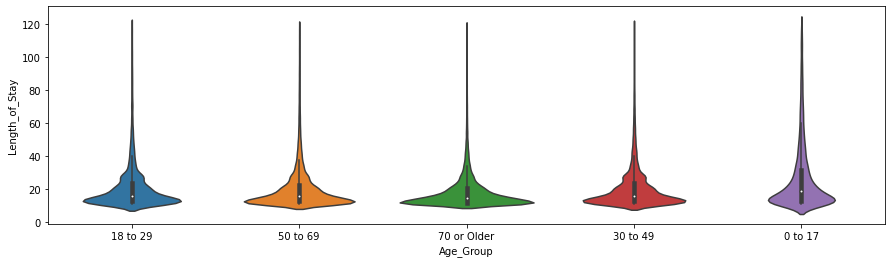

In [50]:
plt.figure(figsize=(15,4))

sns.violinplot(x= 'Age_Group', y= 'Length_of_Stay', data= df.query('Length_of_Stay > 10'))

- The "0 to 17" category has more of its members (compared to other age groups) spending up to 60 days.
- Categories "18 to 29" and "30 to 49" have some its members concentrated around 30 days on admission more than other age groups
- It is observed that the age group whose members spend the least number of days is "70 or older" category. 
- This category is closely followed by the "50 to 69" category.


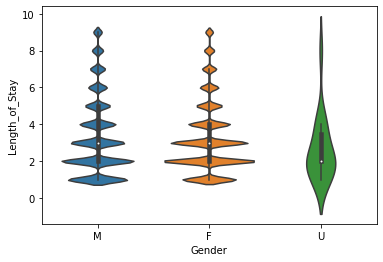

In [51]:
# Length of Stay and Gender

vio('Gender')

Male and female patients follow similar distribution. The number of patients reduces as the lenght of stay increases

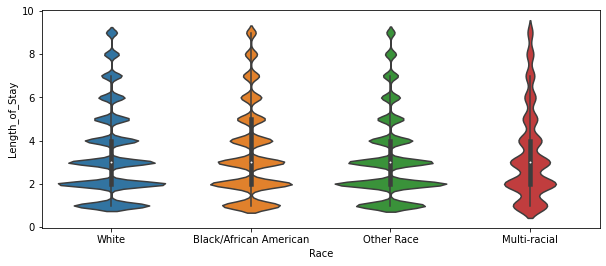

In [52]:
# Length of Stay and Race

plt.figure(figsize=(10,4))

vio('Race')

The distributions are similar for each race. 2 days recorded the highest number of patients for each race 

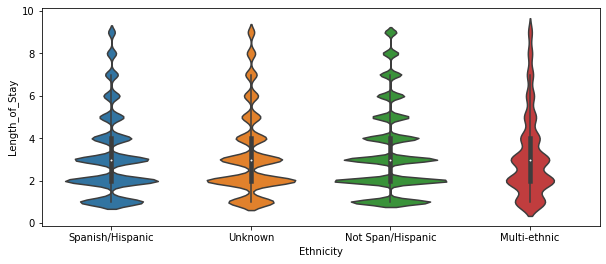

In [53]:
# Length of Stay and Ethnicity

plt.figure(figsize=(10,4))

vio('Ethnicity')

The distributions are similar for each race. 2 days recorded the highest number of patients for each ethnic group 

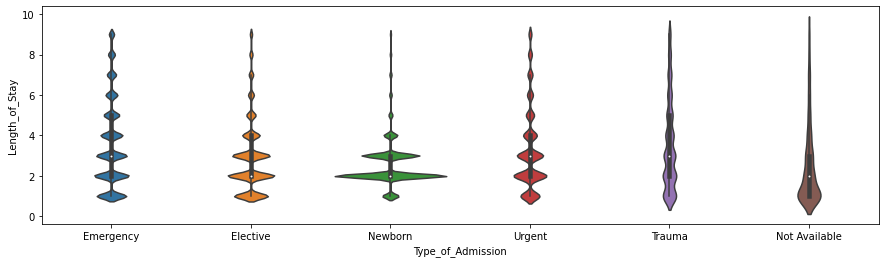

In [54]:
# Length of Stay and Type of admission

plt.figure(figsize=(15,4))

vio('Type_of_Admission')

- Emergency cases mostly spend 1-6 days on admission
- Elective cases mostly spend 1-4 days on admission
- Newborn spend 2 days on admisssion, sometimes 3 days. Only very few spend a day or above 3 days
- Most urgent cases spend 4 days or less with a few others staying above 5 days

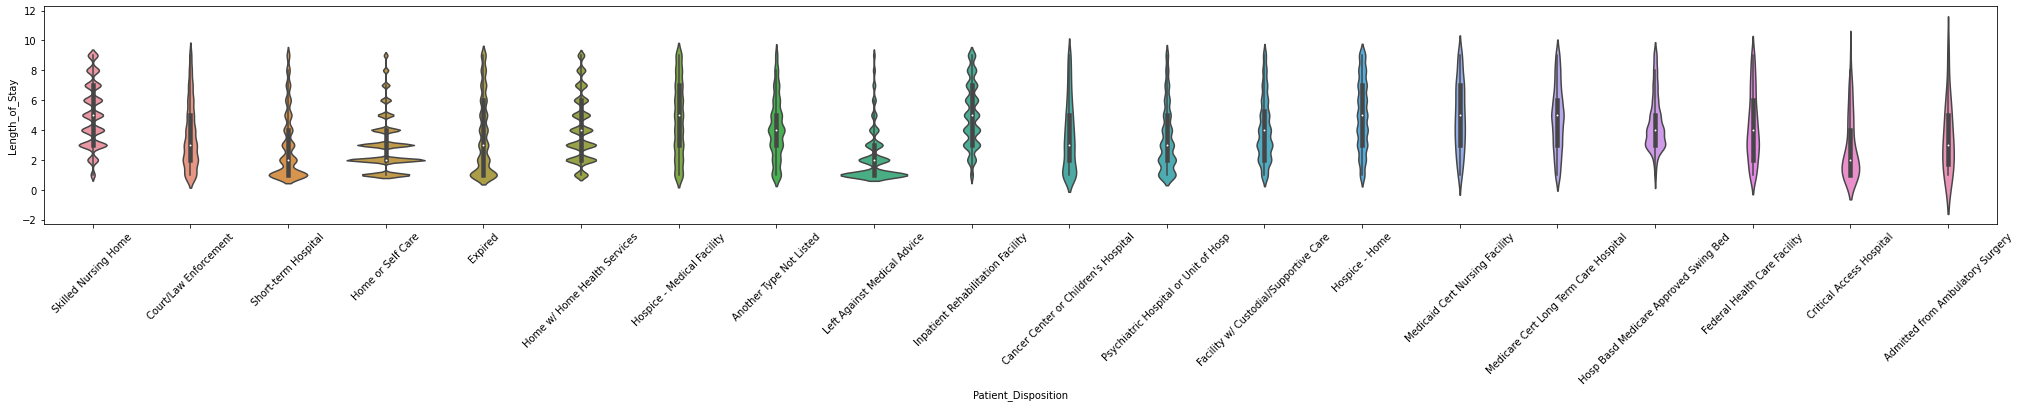

In [55]:
# Length of Stay and Patient Disposition

plt.figure(figsize=(35,4))

vio('Patient_Disposition')
plt.xticks(rotation= 45);

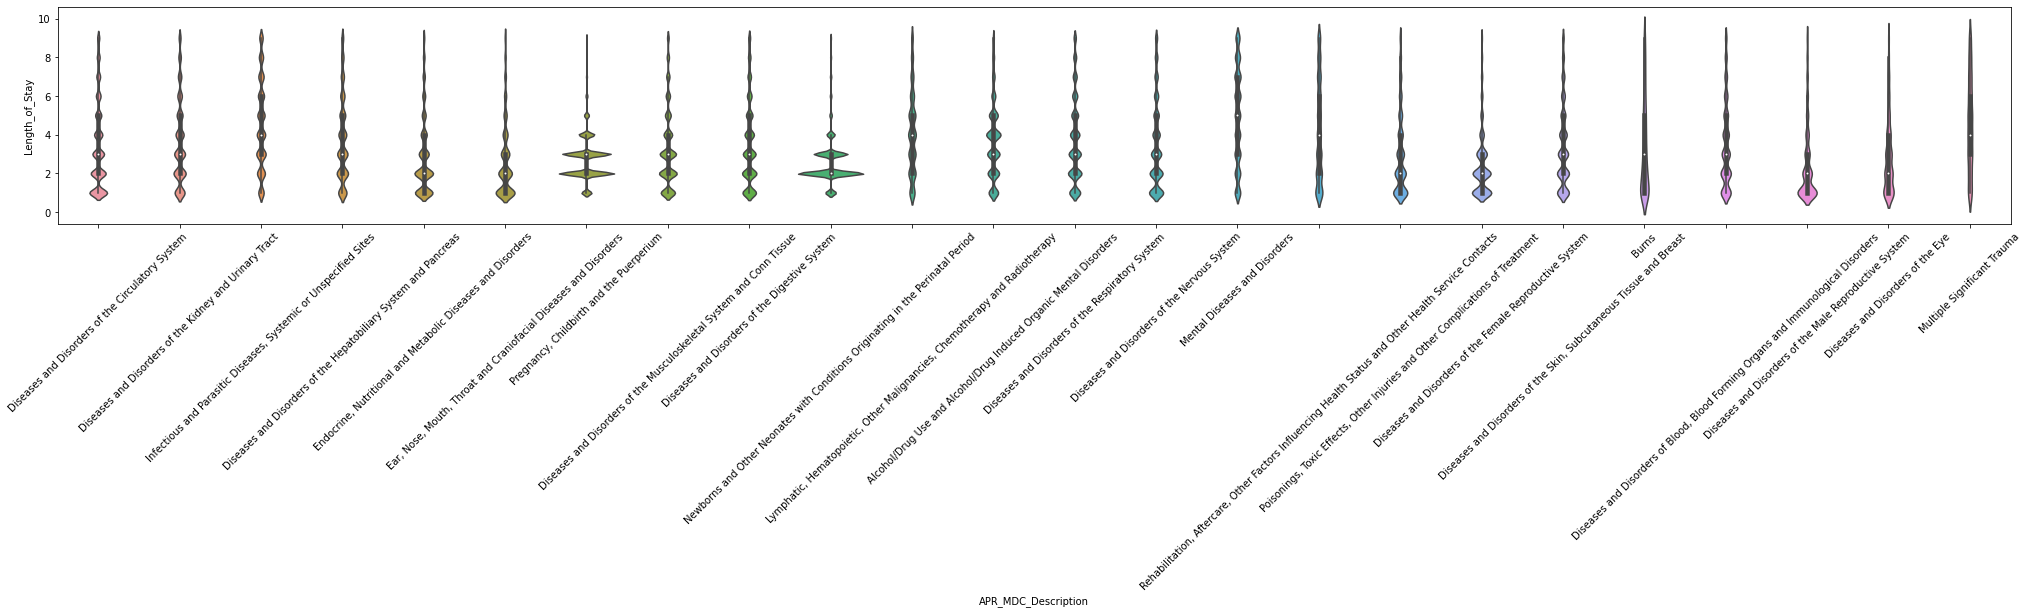

In [56]:
# Length of Stay and Patient Disposition

plt.figure(figsize=(35,4))

vio('APR_MDC_Description')
plt.xticks(rotation= 45);

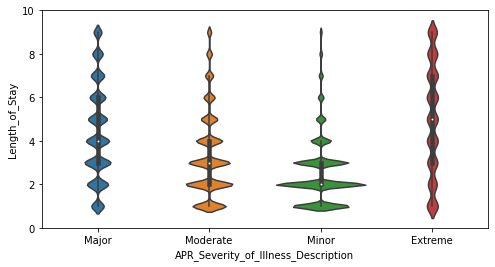

In [57]:
# Length of Stay and APR_Severity_of_Illness_Description

plt.figure(figsize=(8,4))

vio('APR_Severity_of_Illness_Description')

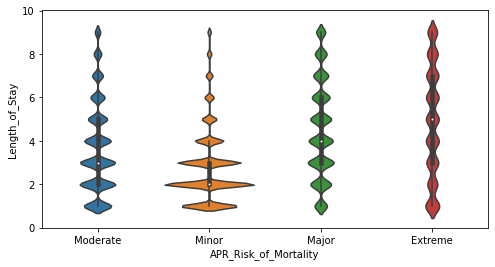

In [58]:
# Length of Stay and APR_Risk_of_Mortality

plt.figure(figsize=(8,4))

vio('APR_Risk_of_Mortality')

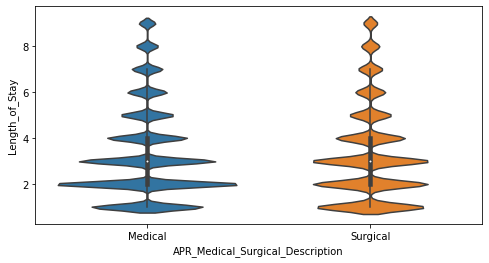

In [59]:
# Length of Stay and APR_Medical_Surgical_Description

plt.figure(figsize=(8,4))

vio('APR_Medical_Surgical_Description')

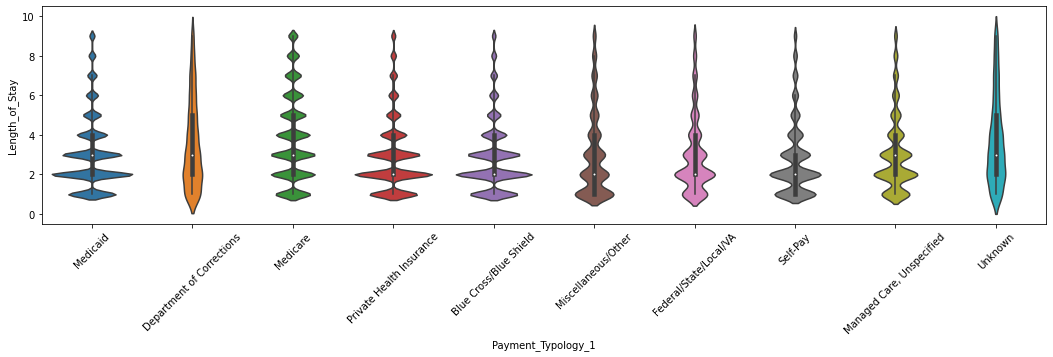

In [60]:
# Length of Stay and APR_Medical_Surgical_Description

plt.figure(figsize=(18,4))

vio('Payment_Typology_1')
plt.xticks(rotation= 45);

<AxesSubplot: >

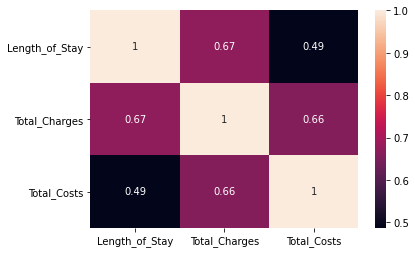

In [61]:
sns.heatmap(df.corr(), annot= True)

## Feature Engineering

Let's define a function that removes outliers from the data

In [23]:
def outlie (data, col):
    
    '''This function takes a dataframe and a string column name as argument, calculates the upper 
    extreme and then removes records values greater than the upper extreme'''
    
    Q1 = data[col].quantile(0.25) # Lower quartile
    Q3 = data[col].quantile(0.75) # Upper quartile
    IQR = Q3 - Q1                 # Interquartile range
    e_upp = Q3 + 1.5 * IQR        # Upper limit
    
    to_drop = data[col][data[col] > e_upp].index # Indices of affected records

    data.drop(index= to_drop, inplace= True)

In [24]:
# Removing outliers from numerical columns 

df2 = df.copy()
for p in ['Length_of_Stay', 'Total_Charges', 'Total_Costs']:
    outlie(df2, p)

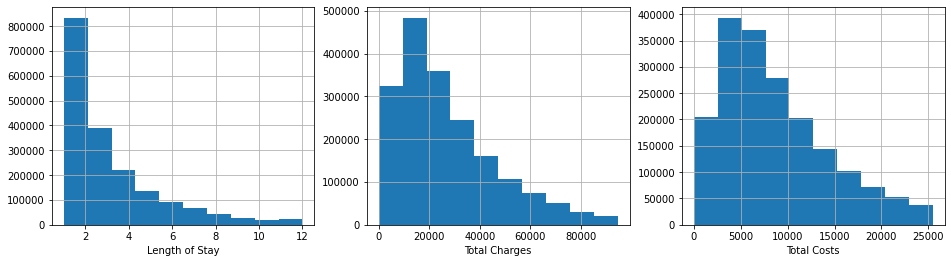

In [25]:
# Confirming removal

plt.figure(figsize= (16,4))

plt.subplot(1,3,1)
df2.Length_of_Stay.hist()
plt.xlabel('Length of Stay')

plt.subplot(1,3,2)
df2.Total_Charges.hist()
plt.xlabel('Total Charges')

plt.subplot(1,3,3)
df2.Total_Costs.hist()
plt.xlabel('Total Costs');

#### Selecting independent and dependent variables

In [26]:
X2 = df2.copy()
y2 = X2.pop('Length_of_Stay')

#### Encoding categorical features

In [27]:
X2_encoded = X2.copy()

for column in X2.select_dtypes('object'):
    X2_encoded[column], _ = X2_encoded[column].factorize()

X2_encoded

,Hospital_Service_Area,Hospital_County,Facility_Name,Age_Group,Gender,Race,Ethnicity,Type_of_Admission,Patient_Disposition,APR_MDC_Description,APR_Severity_of_Illness_Description,APR_Risk_of_Mortality,APR_Medical_Surgical_Description,Payment_Typology_1,Payment_Typology_2,Payment_Typology_3,Emergency_Department_Indicator,Total_Charges,Total_Costs
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,39647.04,17397.59
3,0,0,0,1,0,0,1,0,1,1,0,0,0,1,1,1,0,36031.09,16118.84
4,0,0,0,2,0,0,2,0,0,1,0,1,0,0,0,0,0,30534.00,11921.05
5,0,0,0,1,1,1,1,0,2,2,1,2,0,2,2,1,0,49290.08,18503.26
6,0,0,0,0,0,1,1,0,0,3,0,1,0,1,0,0,0,20511.00,9103.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2343562,2,7,11,1,1,0,1,0,3,18,0,0,0,2,3,0,1,44646.98,9003.49
2343564,0,9,17,1,0,0,1,1,3,13,2,0,1,3,2,0,0,87545.08,16781.23
2343565,0,9,17,1,0,2,2,0,3,3,0,0,0,1,4,0,1,31896.05,6003.38
2343567,2,7,15,3,0,1,0,1,3,17,0,1,1,2,4,0,0,66399.81,13068.87


#### Selecting best features using KBeest

In [28]:
from sklearn.feature_selection import SelectKBest
select = SelectKBest(k=10)
X_kbest = select.fit_transform(X2_encoded, y2)
coloms = select.get_support(indices=True)
coloms

array([ 4,  7, 10, 11, 12, 13, 15, 16, 17, 18], dtype=int64)

In [29]:
kbest_cols = X2_encoded.iloc[:,coloms].columns.to_list()
X2_encoded[kbest_cols]

,Gender,Type_of_Admission,APR_Severity_of_Illness_Description,APR_Risk_of_Mortality,APR_Medical_Surgical_Description,Payment_Typology_1,Payment_Typology_3,Emergency_Department_Indicator,Total_Charges,Total_Costs
2,0,0,0,0,0,0,0,0,39647.04,17397.59
3,0,0,0,0,0,1,1,0,36031.09,16118.84
4,0,0,0,1,0,0,0,0,30534.00,11921.05
5,1,0,1,2,0,2,1,0,49290.08,18503.26
6,0,0,0,1,0,1,0,0,20511.00,9103.80
...,...,...,...,...,...,...,...,...,...,...
2343562,1,0,0,0,0,2,0,1,44646.98,9003.49
2343564,0,1,2,0,1,3,0,0,87545.08,16781.23
2343565,0,0,0,0,0,1,0,1,31896.05,6003.38
2343567,0,1,0,1,1,2,0,0,66399.81,13068.87


In [30]:
X2_encoded.drop(columns= kbest_cols)

,Hospital_Service_Area,Hospital_County,Facility_Name,Age_Group,Race,Ethnicity,Patient_Disposition,APR_MDC_Description,Payment_Typology_2
2,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,1,1,1,1
4,0,0,0,2,0,2,0,1,0
5,0,0,0,1,1,1,2,2,2
6,0,0,0,0,1,1,0,3,0
...,...,...,...,...,...,...,...,...,...
2343562,2,7,11,1,0,1,3,18,3
2343564,0,9,17,1,0,1,3,13,2
2343565,0,9,17,1,2,2,3,3,4
2343567,2,7,15,3,1,0,3,17,4


In [31]:
X2 = X2[kbest_cols]
X2

,Gender,Type_of_Admission,APR_Severity_of_Illness_Description,APR_Risk_of_Mortality,APR_Medical_Surgical_Description,Payment_Typology_1,Payment_Typology_3,Emergency_Department_Indicator,Total_Charges,Total_Costs
2,F,Emergency,Moderate,Moderate,Medical,Department of Corrections,None,N,39647.04,17397.59
3,F,Emergency,Moderate,Moderate,Medical,Medicaid,Self-Pay,N,36031.09,16118.84
4,F,Emergency,Moderate,Minor,Medical,Department of Corrections,None,N,30534.00,11921.05
5,M,Emergency,Major,Major,Medical,Medicare,Self-Pay,N,49290.08,18503.26
6,F,Emergency,Moderate,Minor,Medical,Medicaid,None,N,20511.00,9103.80
...,...,...,...,...,...,...,...,...,...,...
2343562,M,Emergency,Moderate,Moderate,Medical,Medicare,None,Y,44646.98,9003.49
2343564,F,Elective,Minor,Moderate,Surgical,Private Health Insurance,None,N,87545.08,16781.23
2343565,F,Emergency,Moderate,Moderate,Medical,Medicaid,None,Y,31896.05,6003.38
2343567,F,Elective,Moderate,Minor,Surgical,Medicare,None,N,66399.81,13068.87


## Model Building

Since we are predicting a numeric variable, our model will be a regression model. We will use different regressors and select the best

#### Scaling numeric variables and encoding categorical variables

In [32]:
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()
X2[['Total_Charges', 'Total_Costs']] = minmax.fit_transform(X2[['Total_Charges', 'Total_Costs']])
y2 =  minmax.fit_transform(np.array(y2).reshape(-1,1))

In [33]:
from sklearn.preprocessing import OneHotEncoder
onehot = OneHotEncoder()
X_hot = onehot.fit_transform(X2)

#### Splitting into train and test sets

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_hot[:50000], y2[:50000], test_size = 0.3, random_state = 42)

#### Training the model on Linear Regressor

In [66]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

#### Predicting test set

In [68]:
y_pred = lin_reg.predict(X_test)

#### Evaluating model

In [69]:
# MAE

from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

5.422388124267379

In [70]:
# RMSE

from sklearn.metrics import mean_squared_error
(mean_squared_error(y_test, y_pred))**0.5

9.228494205776421

#### Training the model on Decision Tree Regressor

In [71]:
from sklearn.tree import DecisionTreeRegressor
dectree = DecisionTreeRegressor()
dectree.fit(X_train, y_train)

DecisionTreeRegressor()

#### Predicting test set

In [75]:
y_pred = dectree.predict(X_test)

#### Evaluating model

In [76]:
# MAE

from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

4.131107936507937

In [77]:
# RMSE

from sklearn.metrics import mean_squared_error
(mean_squared_error(y_test, y_pred))**0.5

9.06111996429286

#### Training the model on Support Vector Regressor

In [78]:
from sklearn.svm import SVR
svr = SVR(kernel = 'rbf')
svr.fit(X_train, y_train)

SVR()

#### Predicting test set

In [79]:
y_pred = svr.predict(X_test)

#### Evaluating model

In [80]:
# MAE

from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

3.813778038900168

In [81]:
# RMSE

from sklearn.metrics import mean_squared_error
(mean_squared_error(y_test, y_pred))**0.5

8.543501226816218

#### Training the model on Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators = 10, random_state = 0)
rfr.fit(X_train, y_train)

#### Predicting test set

In [ ]:
y_pred = rfr.predict(X_test)

#### Evaluating model

In [ ]:
# MAE

from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

In [ ]:
# RMSE

from sklearn.metrics import mean_squared_error
(mean_squared_error(y_test, y_pred))**0.5

#### Training the model on Polynomial Regression

In [35]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)
X_poly_train = poly_reg.fit_transform(X_train)   # Transforming train set into polynomials
X_poly_test = poly_reg.fit_transform(X_test)     # Transforming test set into polynomials
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly_train, y_train)

KeyboardInterrupt: 

#### Predicting test set

In [ ]:
y_pred = lin_reg_2.predict(X_poly_test)

#### Evaluating model

In [ ]:
# MAE

from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

In [ ]:
# RMSE

from sklearn.metrics import mean_squared_error
(mean_squared_error(y_test, y_pred))**0.5